In [31]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from googletrans import Translator
import pandas as pd
import csv  

In [32]:
url = 'https://www.goodreads.com/review/list/19894254-karla-mart-nez?sort=review&view=reviews'
response = requests.get(url)
response

<Response [200]>

In [33]:
if response.status_code == 200:
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    titles = soup.find_all('a')
    
    for title in titles:
        print(title.text)
    if not titles:
        print('No se encontraron títulos de artículos en la página.')
else:
    print('Error al obtener la página:', response.status_code)



Home
My Books
Browse ▾
Recommendations
Choice Awards
Genres
Giveaways
New Releases
Lists
Explore
News & Interviews
Art
Biography
Business
Children's
Christian
Classics
Comics
Cookbooks
Ebooks
Fantasy
Fiction
Graphic Novels
Historical Fiction
History
Horror
Memoir
Music
Mystery
Nonfiction
Poetry
Psychology
Romance
Science
Science Fiction
Self Help
Sports
Thriller
Travel
Young Adult
More Genres
Community ▾
Groups
Quotes
Ask the Author
Sign In
Join
Sign up

View profile
Profile
Friends
Groups
Discussions
Comments
Reading Challenge
Kindle Notes & Highlights
Quotes
Favorite genres
Friends’ recommendations
Account settings
Help
Sign out
Home
My Books
Browse ▾
Recommendations
Choice Awards
Genres
Giveaways
New Releases
Lists
Explore
News & Interviews
Art
Biography
Business
Children's
Christian
Classics
Comics
Cookbooks
Ebooks
Fantasy
Fiction
Graphic Novels
Historical Fiction
History
Horror
Memoir
Music
Mystery
Nonfiction
Poetry
Psychology
Romance
Science
Science Fiction
Self Help
Sports
Thr

## Extraer tablas

In [34]:
if response.status_code == 200:
    # Parsear el contenido HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Encontrar todas las tablas en la página
    tables = soup.find_all('table')
    
    # Iterar sobre todas las tablas
    for table in tables:
        # Encontrar todas las filas (tr) de la tabla
        rows = table.find_all('tr')
        
        # Iterar sobre todas las filas
        for row in rows:
            # Encontrar todas las celdas (td) en la fila
            cells = row.find_all(['td', 'th'])
            
            # Imprimir el contenido de cada celda
            for cell in cells:
                print(cell.text.strip())
            print('---')  # Separador entre filas para mayor claridad
else:
    print('Error al obtener la página:', response.status_code)

visible columns
                
select all



                These settings only apply to table view.
              


asin

author

avg rating

comments



cover

date added

date pub

date pub (ed.)



date read

date started

format

isbn



isbn13

notes

num pages

num ratings



owned

position

rating

read count



review

my rating

title

votes
column sets
main

reading

list

review

owned
---

#
cover
title
author
isbn
isbn13
asin
pages
rating
ratings
pub
(ed.)
rating
my rating
review
notes

comments
votes
count
started
read
added

owned


format

---
checkbox
position
cover
title 
      A través de mi ventana
        (Hidalgos, #1)
author Godoy, Ariana
*
isbn
isbn13
asin
num pages 
        416
        pp
avg rating    3.41
num ratings    105,413
date pub      May 16, 2019
date pub edition      May 16, 2019
Karla's rating
it was ok
my rating
1 of 5 stars2 of 5 stars3 of 5 stars4 of 5 stars5 of 5 stars



add to shelves
review
Raquel, como le rezas a la Virgen de los Abdom

## Extraer tabla de comentarios

In [35]:

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    tabla = soup.find('table')
    
    # Comprobar si se encontró la tabla
    if tabla:
        # Inicializar una lista para almacenar los datos de la tabla
        datos_tabla = []
        
        # Encontrar todas las filas de la tabla
        filas = tabla.find_all('th')
        
        # Iterar sobre las filas
        for fila in filas:
            # Inicializar una lista para almacenar los datos de la fila
            datos_fila = []
            
            # Encontrar todas las celdas de la fila
            celdas = fila.find_all(['tr', 'td'])  # Cambiado 'tr' por 'th'
            
            # Iterar sobre las celdas
            for celda in celdas:
                # Extraer el texto de la celda y eliminar los espacios en blanco al principio y al final
                texto_celda = celda.get_text(strip=True)
                
                # Si el texto está vacío, agregar None a la lista de datos de la fila
                if not texto_celda:
                    datos_fila.append(None)
                else:
                    datos_fila.append(texto_celda)

            # Agregar los datos de la fila a la lista de datos de la tabla
            datos_tabla.append(datos_fila)
        
        # Escribir los datos en un archivo CSV
        with open('demo.csv', 'w', newline='', encoding='utf-8') as csvfile:  # Cambiado el nombre del archivo
            writer = csv.writer(csvfile)
            writer.writerows(datos_tabla)
            
        # Imprimir los datos de la tabla
        for fila in datos_tabla:
            print(fila)
    else:
        print('No se encontró ninguna tabla en la página.')
else:
    print('Error al realizar la solicitud a la página:', response.status_code)


## No tocar


In [36]:

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    tabla = soup.find('tbody')
    
    # Comprobar si se encontró la tabla
    if tabla:
        # Inicializar una lista para almacenar los datos de la tabla
        datos_tabla = []
        
        # Encontrar todas las filas de la tabla
        filas = tabla.find_all('tr')
        
        # Iterar sobre las filas
        for fila in filas:
            # Inicializar una lista para almacenar los datos de la fila
            datos_fila = []
            
            # Encontrar todas las celdas de la fila
            celdas = fila.find_all(['tr', 'td'])
            
            # Iterar sobre las celdas
            for celda in celdas:
                # Extraer el texto de la celda y eliminar los espacios en blanco al principio y al final
                texto_celda = celda.get_text(strip=True)
                
                # Si el texto está vacío, agregar None a la lista de datos de la fila
                if not texto_celda:
                    datos_fila.append(None)
                else:
                    datos_fila.append(texto_celda)

            # Agregar los datos de la fila a la lista de datos de la tabla
            datos_tabla.append(datos_fila)
        
        # Escribir los datos en un archivo CSV
        with open('primeros-comentarios.csv', 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerows(datos_tabla)
            
            # Agregar los datos de la fila a la lista de datos de la tabla
            datos_tabla.append(datos_fila)
        
        # Imprimir los datos de la tabla
        for fila in datos_tabla:
            print(fila)
    else:
        print('No se encontró ninguna tabla en la página.')
else:
    print('Error al realizar la solicitud a la página:', response.status_code)

['checkbox', 'position', 'cover', 'titleA través de mi ventana(Hidalgos, #1)', 'authorGodoy, Ariana*', 'isbn', 'isbn13', 'asin', 'num pages416pp', 'avg rating3.41', 'num ratings105,413', 'date pubMay 16, 2019', 'date pub editionMay 16, 2019', "Karla's ratingit was ok", 'my rating1 of 5 stars2 of 5 stars3 of 5 stars4 of 5 stars5 of 5 starsadd to shelves', 'reviewRaquel, como le rezas a la Virgen de los Abdominales porfa rezale a la VIRGEN DE LA DIGNIDAD.', 'notesNotes are private!', 'comments2', 'votes1769', '# times read1', 'date startedMay 09, 2021', 'date readMay 10, 2021', 'date addedMay 09, 2021', 'owned', 'formatWattpad', 'actionsview']
['checkbox', 'position', 'cover', 'titleUn cuento perfecto', 'authorBenavent, Elísabet', 'isbn8491291911', 'isbn139788491291916', 'asin8491291911', 'num pages640pp', 'avg rating4.17', 'num ratings63,462', 'date pubFeb 20, 2020', 'date pub editionFeb 20, 2020', "Karla's ratingit was amazing", 'my rating1 of 5 stars2 of 5 stars3 of 5 stars4 of 5 star

## Encabezados

In [37]:
df = pd.read_csv('primeros-comentarios.csv', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,checkbox,position,cover,"titleA través de mi ventana(Hidalgos, #1)","authorGodoy, Ariana*",isbn,isbn13,asin,num pages416pp,avg rating3.41,...,notesNotes are private!,comments2,votes1769,# times read1,"date startedMay 09, 2021","date readMay 10, 2021","date addedMay 09, 2021",owned,formatWattpad,actionsview
1,checkbox,position,cover,titleUn cuento perfecto,"authorBenavent, Elísabet",isbn8491291911,isbn139788491291916,asin8491291911,num pages640pp,avg rating4.17,...,notesNotes are private!,comments0,votes485,# times read1,"date startedFeb 04, 2021","date readFeb 09, 2021","date addedFeb 04, 2021",owned,formatPaperback,actionsview
2,checkbox,position,cover,titleNosotros en la Luna,"authorKellen, Alice*",isbn8408223291,isbn139788408223290,asin8408223291,num pages477pp,avg rating4.15,...,notesNotes are private!,comments2,votes473,# times read1,"date startedAug 07, 2021","date readAug 07, 2021","date addedAug 07, 2021",owned,formatPaperback,actionsview
3,checkbox,position,cover,"titleThe Dare(Losers, #0.5)","authorLaroux, Harley*",isbn,isbn13,asinB07Z43B2TY,num pages133pp,avg rating3.53,...,notesNotes are private!,comments0,votes338,# times read2,"date startedDec 02, 2023Jun 26, 2021","date readDec 03, 2023Jun 26, 2021","date addedJun 26, 2021",owned,formatKindle Edition,actionsview
4,checkbox,position,cover,titleSin Etiquetas,"authorMartínez, Karla*",isbn9566184484,isbn139789566184485,asinB0CBQQXQK3,num pages496pp,avg rating3.56,...,notesNotes are private!,comments1,votes299,# times read1,"date startedJul 27, 2023","date readJul 27, 2023","date addedJul 27, 2023",owned,formatPaperback,actionsview


In [38]:
df.iloc[:6, 15] 

0    reviewRaquel, como le rezas a la Virgen de los...
1    reviewno sé si darle 4.5 o 5 estrellas, pero e...
2    reviewno es que no haya disfrutado este libro,...
3    review2023:muy hot. la karla del 2021 era tan ...
4    review¿ES MUY PATÉTICO DARLE 5 ESTRELLAS A MI ...
5    review4.5 o 4.75no esperaba nada de este libro...
Name: 15, dtype: object

In [39]:
df = df.loc[:, [3, 4, 15,]]
df.head()

,3,4,15
0,"titleA través de mi ventana(Hidalgos, #1)","authorGodoy, Ariana*","reviewRaquel, como le rezas a la Virgen de los..."
1,titleUn cuento perfecto,"authorBenavent, Elísabet","reviewno sé si darle 4.5 o 5 estrellas, pero e..."
2,titleNosotros en la Luna,"authorKellen, Alice*","reviewno es que no haya disfrutado este libro,..."
3,"titleThe Dare(Losers, #0.5)","authorLaroux, Harley*",review2023:muy hot. la karla del 2021 era tan ...
4,titleSin Etiquetas,"authorMartínez, Karla*",review¿ES MUY PATÉTICO DARLE 5 ESTRELLAS A MI ...


In [40]:
df = df.rename(columns = {3: 'Novela', 4: 'Autor', 15: 'Comentario'})
df.head()

,Novela,Autor,Comentario
0,"titleA través de mi ventana(Hidalgos, #1)","authorGodoy, Ariana*","reviewRaquel, como le rezas a la Virgen de los..."
1,titleUn cuento perfecto,"authorBenavent, Elísabet","reviewno sé si darle 4.5 o 5 estrellas, pero e..."
2,titleNosotros en la Luna,"authorKellen, Alice*","reviewno es que no haya disfrutado este libro,..."
3,"titleThe Dare(Losers, #0.5)","authorLaroux, Harley*",review2023:muy hot. la karla del 2021 era tan ...
4,titleSin Etiquetas,"authorMartínez, Karla*",review¿ES MUY PATÉTICO DARLE 5 ESTRELLAS A MI ...


In [41]:
df['Comentario'].head()

0    reviewRaquel, como le rezas a la Virgen de los...
1    reviewno sé si darle 4.5 o 5 estrellas, pero e...
2    reviewno es que no haya disfrutado este libro,...
3    review2023:muy hot. la karla del 2021 era tan ...
4    review¿ES MUY PATÉTICO DARLE 5 ESTRELLAS A MI ...
Name: Comentario, dtype: object

In [42]:
## Código perfecto. Separa la palabra 'review' de lo que sea
def separar_palabra(cadena):
    nueva_cadena = ''
    i = 0
    while i < len(cadena):
        if cadena[i:i+6].lower() == 'review':
            nueva_cadena += 'review '
            i += 6
        elif cadena[i].isalpha() or cadena[i].isdigit():
            nueva_cadena += cadena[i]
            i += 1
        else:
            nueva_cadena += '' + cadena[i]  # Agregar espacio antes de símbolo
            i += 1

    return nueva_cadena

# Aplicar la función a la columna "Comentario" del DataFrame df
df['Comentario'] = df['Comentario'].apply(separar_palabra)

df['Comentario'].head(10)


0    review Raquel, como le rezas a la Virgen de lo...
1    review no sé si darle 4.5 o 5 estrellas, pero ...
2    review no es que no haya disfrutado este libro...
3    review 2023:muy hot. la karla del 2021 era tan...
4    review ¿ES MUY PATÉTICO DARLE 5 ESTRELLAS A MI...
5    review 4.5 o 4.75no esperaba nada de este libr...
6    review 2023:¿qué tan traumada tengo que estar ...
7                              review 4.5ESE FINAAAAAL
8    review todas las estrellas.este libro hizo que...
9    review 2023:4ta vez releyendo este libro. no m...
Name: Comentario, dtype: object

### Eliminar palabra específica 'review'

In [43]:
df['Comentario'] = df['Comentario'].str.replace('review', '')
df['Comentario']

0      Raquel, como le rezas a la Virgen de los Abdo...
1      no sé si darle 4.5 o 5 estrellas, pero el pun...
2      no es que no haya disfrutado este libro, pero...
3      2023:muy hot. la karla del 2021 era tan inoce...
4      ¿ES MUY PATÉTICO DARLE 5 ESTRELLAS A MI PROPI...
5      4.5 o 4.75no esperaba nada de este libro y lo...
6      2023:¿qué tan traumada tengo que estar para a...
7                                      4.5ESE FINAAAAAL
8      todas las estrellas.este libro hizo que me cu...
9      2023:4ta vez releyendo este libro. no me cans...
10     ME ENCUENTRO DESTROZADA.amé este libro con to...
11     no hay nada que no ame de este libro. es lo m...
12     2022no sé por qué pensé que este libro me iba...
13                                me entró algo al ojo.
14     se me hizo un poco lento el libro y la histor...
15     3/5¿han escuchado el dicho "persona correcta,...
16                                        misha, te amo
17     2023: 3.5/5la pasé muy bien leyendo este 

In [44]:
df['Comentario'].loc[7]


' 4.5ESE FINAAAAAL'

## Análisis de comentarios 

In [45]:
from textblob import TextBlob
from googletrans import Translator
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [46]:
# Comentarios ficticios sobre reseñas de un libro
comentarios = df['Comentario']
# Crear un objeto Translator
translator = Translator()

# Inicializar el analizador de sentimientos VADER
sid = SentimentIntensityAnalyzer()

# Función para realizar el análisis de sentimientos con TextBlob y devolver un porcentaje de confianza
def analizar_sentimiento_textblob(comentario):
    blob = TextBlob(comentario)
    polaridad = blob.sentiment.polarity
    subjetividad = blob.sentiment.subjectivity
    
    # Calcular la confianza como el valor absoluto de la polaridad + subjetividad
    confianza = abs(polaridad) + subjetividad
    
    if polaridad > 0:
        return "Positivo", confianza
    elif polaridad < 0:
        return "Negativo", confianza
    else:
        return "Neutral", confianza

# Función para realizar el análisis de sentimientos con VADER
def analizar_sentimiento_vader(comentario):
    polaridad = sid.polarity_scores(comentario)['compound']
    if polaridad > 0:
        return "Positivo"
    elif polaridad < 0:
        return "Negativo"
    else:
        return "Neutral"

# Lista para almacenar resultados del análisis de sentimientos con TextBlob
resultados_textblob = []

# Lista para almacenar resultados del análisis de sentimientos con VADER
resultados_vader = []

# Traducir cada comentario al inglés, luego analizar sentimientos con TextBlob y VADER
for comentario in comentarios:
    # Traducir el comentario al inglés
    comentario_ingles = translator.translate(comentario, src='es', dest='en').text
    
    # Analizar sentimientos con TextBlob
    sentimiento_textblob, confianza_textblob = analizar_sentimiento_textblob(comentario_ingles)
    resultados_textblob.append((comentario, sentimiento_textblob, confianza_textblob))
    
    # Analizar sentimientos con VADER
    sentimiento_vader = analizar_sentimiento_vader(comentario_ingles)
    resultados_vader.append((comentario, sentimiento_vader))

# Crear DataFrames para los resultados
df_textblob = pd.DataFrame(resultados_textblob, columns=['Comentario', 'Sentimiento TextBlob', 'Confianza TextBlob'])
df_vader = pd.DataFrame(resultados_vader, columns=['Comentario', 'Sentimiento VADER'])

# Mostrar los resultados
print("Resultados del análisis de sentimientos con TextBlob:")
print(df_textblob)
print("\nResultados del análisis de sentimientos con VADER:")
print(df_vader)


Resultados del análisis de sentimientos con TextBlob:
                                           Comentario Sentimiento TextBlob  \
0    Raquel, como le rezas a la Virgen de los Abdo...              Neutral   
1    no sé si darle 4.5 o 5 estrellas, pero el pun...             Positivo   
2    no es que no haya disfrutado este libro, pero...             Positivo   
3    2023:muy hot. la karla del 2021 era tan inoce...             Positivo   
4    ¿ES MUY PATÉTICO DARLE 5 ESTRELLAS A MI PROPI...             Positivo   
5    4.5 o 4.75no esperaba nada de este libro y lo...             Positivo   
6    2023:¿qué tan traumada tengo que estar para a...             Positivo   
7                                    4.5ESE FINAAAAAL             Positivo   
8    todas las estrellas.este libro hizo que me cu...             Positivo   
9    2023:4ta vez releyendo este libro. no me cans...             Positivo   
10   ME ENCUENTRO DESTROZADA.amé este libro con to...             Positivo   
11   no ha

## Separar TextBlob y Vader

In [47]:
df_textblob.head()

,Comentario,Sentimiento TextBlob,Confianza TextBlob
0,"Raquel, como le rezas a la Virgen de los Abdo...",Neutral,0.000000
1,"no sé si darle 4.5 o 5 estrellas, pero el pun...",Positivo,0.960227
2,"no es que no haya disfrutado este libro, pero...",Positivo,0.576108
3,2023:muy hot. la karla del 2021 era tan inoce...,Positivo,0.730782
4,¿ES MUY PATÉTICO DARLE 5 ESTRELLAS A MI PROPI...,Positivo,1.057143


In [48]:
df_vader.head()

,Comentario,Sentimiento VADER
0,"Raquel, como le rezas a la Virgen de los Abdo...",Positivo
1,"no sé si darle 4.5 o 5 estrellas, pero el pun...",Positivo
2,"no es que no haya disfrutado este libro, pero...",Negativo
3,2023:muy hot. la karla del 2021 era tan inoce...,Positivo
4,¿ES MUY PATÉTICO DARLE 5 ESTRELLAS A MI PROPI...,Negativo


## Comentarios negativos


In [49]:
df_negativo_text = df_textblob[df_textblob['Sentimiento TextBlob'] == 'Negativo']
df_negativo_text.value_counts()


Comentario                                                                                                      Sentimiento TextBlob  Confianza TextBlob
no hay nada que no ame de este libro. es lo más cercano a casa que he leído.                                    Negativo              0.85                  1
se me hizo un poco lento el libro y la historia un poco repetitiva jijiji. no se si siga con los otros libros.  Negativo              0.50                  1
Name: count, dtype: int64

In [50]:
df_negativo_vader = df_vader[df_vader['Sentimiento VADER'] == 'Negativo']
df_negativo_vader.value_counts()

Comentario                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

## Reporte gráfico

In [51]:
import matplotlib.pyplot as plt

#### Reporte TextBlob

In [52]:
df_textblob['Sentimiento TextBlob'].value_counts() 

Sentimiento TextBlob
Positivo    15
Neutral      3
Negativo     2
Name: count, dtype: int64

In [53]:
df_textblob.shape[0] 

20

In [54]:
total_sentimientos = df_textblob['Sentimiento TextBlob'].value_counts()/df_textblob.shape[0]
total_sentimientos 

Sentimiento TextBlob
Positivo    0.75
Neutral     0.15
Negativo    0.10
Name: count, dtype: float64

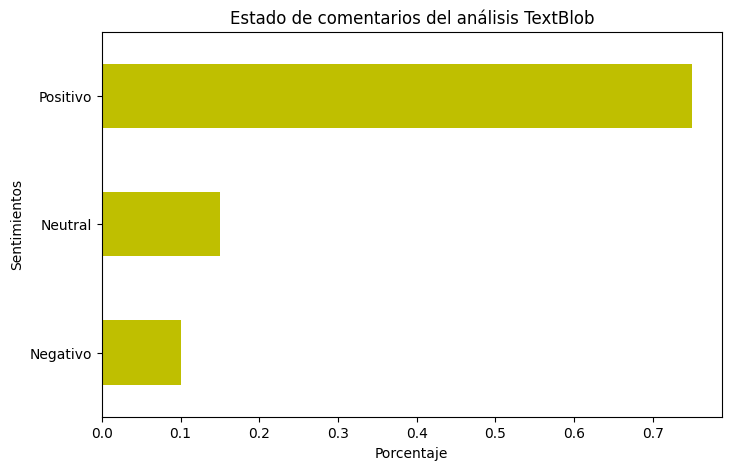

In [55]:
total_sentimientos = df_textblob['Sentimiento TextBlob'].value_counts()/df_textblob.shape[0]

total_sentimientos = total_sentimientos.sort_values() 

plt.figure(figsize=(8, 5))
total_sentimientos.plot(kind='barh', color = "y")
plt.title("Estado de comentarios del análisis TextBlob")
plt.xlabel("Porcentaje")
plt.ylabel("Sentimientos")
plt.xticks(rotation=0)
plt.show()

## Reporte Vader    

In [56]:
total_vader = df_vader['Sentimiento VADER'].value_counts()
total_vader

Sentimiento VADER
Positivo    13
Negativo     6
Neutral      1
Name: count, dtype: int64

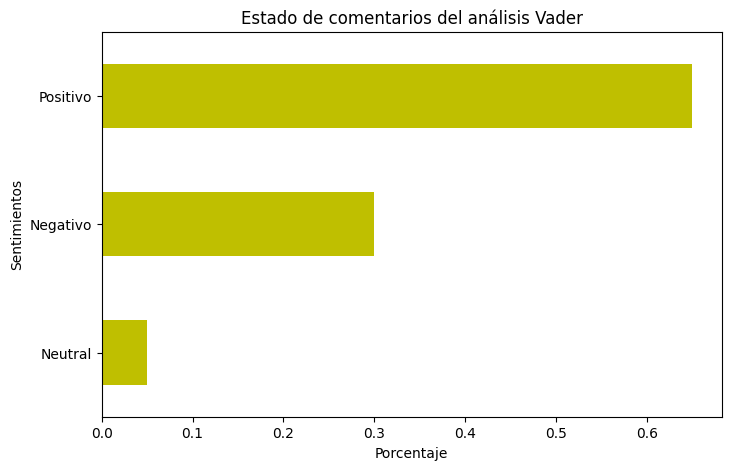

In [57]:
total_vader = df_vader['Sentimiento VADER'].value_counts() / df_vader.shape[0]

total_vader = total_vader.sort_values(ascending= True) 

plt.figure(figsize=(8, 5))
total_vader.plot(kind='barh', color = "y")
plt.title("Estado de comentarios del análisis Vader")
plt.xlabel("Porcentaje")
plt.ylabel("Sentimientos")
plt.xticks(rotation=0)
plt.show()